In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data set
data=pd.read_csv("sales_advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
#check the colum values
data.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
#check the no of rows and colms
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
#chexk the null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [18]:
#correlation
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

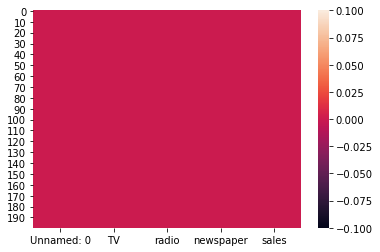

In [19]:
sns.heatmap(df.isnull())

<AxesSubplot:>

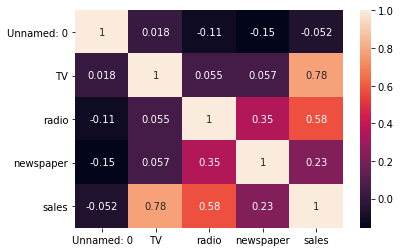

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:>

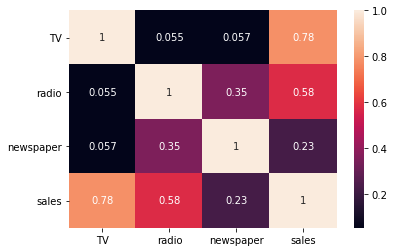

In [23]:
sns.heatmap(df.corr(),annot=True)

TV              AxesSubplot(0.125,0.657941;0.352273x0.222059)
radio        AxesSubplot(0.547727,0.657941;0.352273x0.222059)
newspaper       AxesSubplot(0.125,0.391471;0.352273x0.222059)
sales        AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

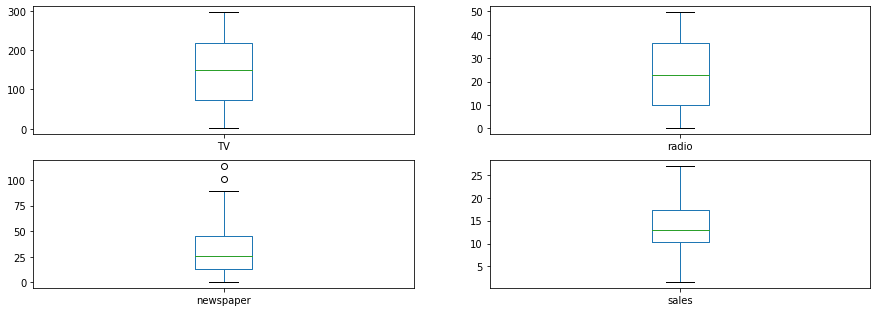

In [24]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(15,8))

<AxesSubplot:xlabel='sales', ylabel='Density'>

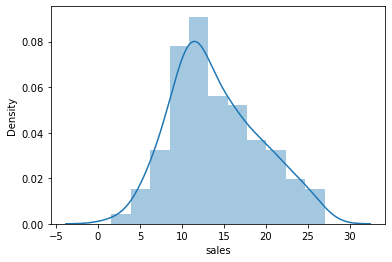

In [26]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df["sales"])

<AxesSubplot:xlabel='TV', ylabel='Density'>

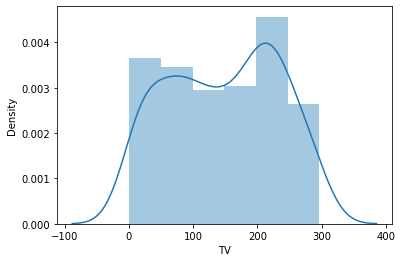

In [27]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

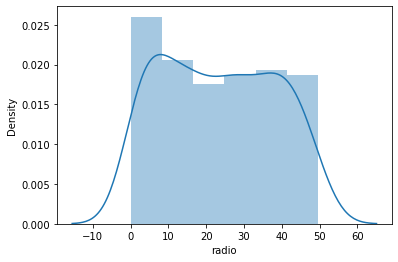

In [28]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

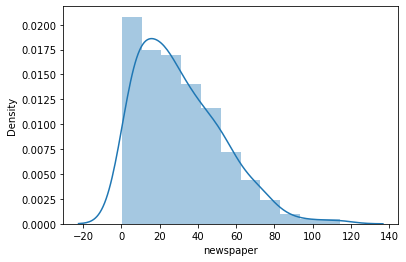

In [29]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

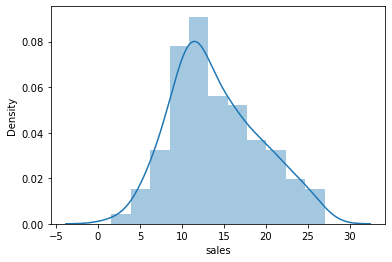

In [30]:
sns.distplot(df["sales"])

In [31]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [32]:
x = df.drop(labels=["sales"], axis = 1)
y = df['sales']

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.22,random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
lr_pred=lr.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
print("mean abs error is",mean_absolute_error(y_test, lr_pred))
print("mean sqr error is",mean_squared_error(y_test, lr_pred))
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

mean abs error is 1.46907663797336
mean sqr error is 3.23647845159526
1.7990215261622802


In [41]:
 from sklearn.metrics import r2_score
r2_score(y_test, lr_pred)

0.8786790788955466